In [1]:
FIG_DIR = '/casa/haedong/project/dicer_motif/figure_files/220322_base_composition_at_starting_positions_of_mature_mirnas'

In [2]:
from collections import defaultdict

In [3]:
id2pri = {}
for line in open('/casa/haedong/ref/mirbase/v22.1/hairpin.fa','r'):
    if line.startswith('>'):
        line = line.split()
        
        if line[0].split('-')[0][1:] == 'hsa': id2pri[line[1]] = line[0][1:]

In [4]:
from Bio import SeqIO

In [5]:
mature2seq_mirgenedb = {}
for record in SeqIO.parse(open('/casa/haedong/ref/mirgenedb/v2.0/ALL-mature.fa'),'fasta'):
    mature2seq_mirgenedb[record.id] = str(record.seq)
for record in SeqIO.parse(open('/casa/haedong/ref/mirgenedb/v2.0/ALL-star.fa'),'fasta'):
    mature2seq_mirgenedb[record.id] = str(record.seq)

In [6]:
mature2seq_mirgenedb

{'Aae-Bantam_3p': 'UGAGAUCAUUUUGAAAGCUGAUU',
 'Bge-Bantam_3p': 'UGAGAUCAUUGUGAAAGCUGAUU',
 'Cgi-Bantam_3p': 'UGAGAUCAUUGUGAAAACUGAUU',
 'Cte-Bantam_3p': 'UGAGAUCAUUGUGAAAACUAAUC',
 'Dan-Bantam_3p': 'UGAGAUCAUUUUGAAAGCUGAUU',
 'Dme-Bantam_3p': 'UGAGAUCAUUUUGAAAGCUGAUU',
 'Dmo-Bantam_3p': 'UGAGAUCAUUUUGAAAGCUGAUU',
 'Dpu-Bantam_3p': 'UGAGAUCAUUGUGAAAGCUGAUU',
 'Hme-Bantam_3p': 'UGAGAUCAUUGUGAAAGCUAAUU',
 'Lan-Bantam_3p': 'UGAGAUCAUUGUGAAAACUGAUU',
 'Lgi-Bantam_3p': 'UGAGAUCACUGUGAAAACUAAUU',
 'Tca-Bantam_3p': 'UGAGAUCAUUGUGAAAGCUGAUU',
 'Asu-Bantam-o1_3p': 'UGAGAUCAUUGUGAAAGCUAUU',
 'Asu-Bantam-o2_3p': 'UGAGAUCAUGCCACAUCUGUCU',
 'Asu-Bantam-o3_3p': 'UGAGAUCAUGUUACAUCCGACU',
 'Asu-Bantam-o4_3p': 'UGAGAUCAUGCCACAUCUGUCU',
 'Cel-Bantam-P1_3p': 'UGAGAUCGUUCAGUACGGCAAU',
 'Cbr-Bantam-P1a_3p': 'UGAGAUCGUUCAGUACGGCAAU',
 'Cbr-Bantam-P1b_3p': 'UGAGAUCAUUCAAGAAGCCCAAA',
 'Cbr-Bantam-P2_3p': 'UGAGAUCAUUAGUUGAAAGCCGA',
 'Cel-Bantam-P2_3p': 'UGAGAUCAUUAGUUGAAAGCCGA',
 'Cbr-Bantam-P3_3p': 'UGAGAUCAUC

In [7]:
mirgenedb = pd.read_table('/casa/haedong/ref/mirgenedb/v2.0/ALL.gff', skiprows=3, header=None)
mirgenedb

,0,1,2,3,4,5,6,7,8
0,1,.,pre_miRNA,539169,539226,.,+,.,ID=Gga-Mir-1651_pre;Alias=MI0007383
1,1,.,miRNA,539169,539190,.,+,.,ID=Gga-Mir-1651_5p*;Alias=MIMAT0007529
2,1,.,miRNA,539205,539226,.,+,.,ID=Gga-Mir-1651_3p;Alias=MIMAT0007530
3,1,.,pre_miRNA,843242,843306,.,-,.,ID=Gga-Mir-96-P2_pre;Alias=MI0029339
4,1,.,miRNA,843283,843306,.,-,.,ID=Gga-Mir-96-P2_5p;Alias=MIMAT0037544
...,...,...,...,...,...,...,...,...,...
32670,ZWK376327_248187494,.,miRNA,471,492,.,-,.,ID=Xtr-Let-7-P2a2_5p;Alias=MIMAT0003666
32671,ZWK376327_248187494,.,miRNA,423,443,.,-,.,ID=Xtr-Let-7-P2a2_3p*
32672,Z_random,.,pre_miRNA,328171,328227,.,+,.,ID=Tgu-Mir-122_pre;Alias=MI0013742
32673,Z_random,.,miRNA,328171,328192,.,+,.,ID=Tgu-Mir-122_5p;Alias=MIMAT0014529


In [8]:
id2matures_mirgenedb = defaultdict(dict)
for index, row in mirgenedb.loc[mirgenedb.iloc[:, 8].str.startswith('ID=Hsa')].iterrows():
    if row[2] == 'pre_miRNA':
        if 'Alias=' in row[8]: alias = row[8].split('Alias=')[1]
        else: alias = ''
    
    if (row[2] != 'pre_miRNA'):
        mature = row[8].split('ID=')[1].split(';')[0]
        if '5p' in mature: id2matures_mirgenedb[alias]['5p'] = mature2seq_mirgenedb[mature]
        elif '3p' in mature: id2matures_mirgenedb[alias]['3p'] = mature2seq_mirgenedb[mature]
        
pri2matures_mirgenedb = {}
for key, matures in id2matures_mirgenedb.items():
    if (key in id2pri) and (len(matures) == 2): pri2matures_mirgenedb[id2pri[key]] = matures

In [9]:
pri2matures_mirgenedb

{'hsa-mir-200b': {'5p': 'CAUCUUACUGGGCAGCAUUGGA',
  '3p': 'UAAUACUGCCUGGUAAUGAUGAC'},
 'hsa-mir-200a': {'5p': 'CAUCUUACCGGACAGUGCUGGA',
  '3p': 'UAACACUGUCUGGUAACGAUGUU'},
 'hsa-mir-429': {'5p': 'GUCUUACCAGACAUGGUUAGA',
  '3p': 'UAAUACUGUCUGGUAAAACCGU'},
 'hsa-mir-551a': {'5p': 'GAAAUCCAGAGUGGGUGGGGCCA',
  '3p': 'GCGACCCACUCUUGGUUUCCA'},
 'hsa-mir-34a': {'5p': 'UGGCAGUGUCUUAGCUGGUUGU',
  '3p': 'AAUCAGCAAGUAUACUGCCCUA'},
 'hsa-mir-552': {'5p': 'UGUUUAACCUUUUGCCUGUUGG',
  '3p': 'AACAGGUGACUGGUUAGACAAA'},
 'hsa-mir-5581': {'5p': 'GCCUUCCAGGAGAAAUGGAGAC',
  '3p': 'UUCCAUGCCUCCUAGAAGUUCC'},
 'hsa-mir-30e': {'5p': 'UGUAAACAUCCUUGACUGGAAGCU',
  '3p': 'CUUUCAGUCGGAUGUUUACAGC'},
 'hsa-mir-30c-1': {'5p': 'UGUAAACAUCCUACACUCUCAGCU',
  '3p': 'CUGGGAGAGGGUUGUUUACUCC'},
 'hsa-mir-101-1': {'5p': 'CAGUUAUCACAGUGCUGAUGCU',
  '3p': 'GUACAGUACUGUGAUAACUGAA'},
 'hsa-mir-186': {'5p': 'CAAAGAAUUCUCCUUUUGGGCUU',
  '3p': 'GCCCAAAGGUGAAUUUUUUGGG'},
 'hsa-mir-760': {'5p': 'CCCCUCAGUCCACCAGAGCCCGGA',
  '3p': 'CG

In [10]:
len(pri2matures_mirgenedb)

502

In [11]:
import sys
sys.path.append('/casa/haedong/tools')
import plotutils
from matplotlib.ticker import AutoMinorLocator

In [12]:
base2color = {
    'U': '#7bc8c8',
    'A': '#2a7a7b',
    'C': '#e7794f',
    'G': '#890a06'
}

In [13]:
pos2base2count_5p = {
    n: defaultdict(int)
    for n in range(10)
}
pos2base2count_3p = {
    n: defaultdict(int)
    for n in range(10)
}
for pri, matures in pri2matures_mirgenedb.items():
    for n, base in enumerate(matures['5p'][:10]):
        pos2base2count_5p[n][base] += 1
    for n, base in enumerate(matures['3p'][:10]):
        pos2base2count_3p[n][base] += 1

In [14]:
dataframes = []
for pos, base2count in pos2base2count_5p.items():
    lines = []
    for base, count in base2count.items():
        lines.append([base, count])
    df = pd.DataFrame(lines)
    df.columns = ['base', pos]
    df = df.set_index('base')
    dataframes.append(df)
count_5p_mirgenedb = pd.concat(dataframes, axis=1)
count_5p_mirgenedb

/casa/haedong/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


,0,1,2,3,4,5,6,7,8,9
A,136,118,109,92,124,117,164,129,106,137
C,104,104,127,124,96,95,100,133,109,115
G,65,164,127,144,142,141,113,118,117,140
U,197,116,139,142,140,149,125,122,170,110


In [15]:
proportion_5p_mirgenedb = count_5p_mirgenedb / count_5p_mirgenedb.sum() * 100
proportion_5p_mirgenedb

,0,1,2,3,4,5,6,7,8,9
A,27.091633,23.505976,21.713147,18.326693,24.701195,23.306773,32.669323,25.697211,21.115538,27.290837
C,20.717131,20.717131,25.298805,24.701195,19.123506,18.924303,19.920319,26.494024,21.713147,22.908367
G,12.948207,32.669323,25.298805,28.685259,28.286853,28.087649,22.509960,23.505976,23.306773,27.888446
U,39.243028,23.107570,27.689243,28.286853,27.888446,29.681275,24.900398,24.302789,33.864542,21.912351


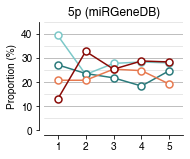

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(2.5, 2))

for base, color in base2color.items():
    ax.plot(proportion_5p_mirgenedb.loc[base, [0, 1, 2, 3, 4]], color=color, linewidth=1.5,
            marker='o', markersize=7, markeredgewidth=1.5, markeredgecolor=color, markerfacecolor='white')
    
ax.set_xlim(-0.5, 4.5)
ax.set_ylim(0, 45)
ax.set_ylabel('Proportion (%)')

ax.yaxis.grid(False)
plotutils.adjust_numbers_style(ax, xgrid=False, ygrid=True)
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.setp(ax.yaxis.get_minorticklines(), visible=False)
plt.grid(True, which='minor', color='#d0d0d0', linestyle='-', linewidth=0.5)

plt.xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(list(range(1, 6, 1)))

ax.set_title('5p (miRGeneDB)')


plt.savefig('{}/mirgenedb.5p.line_plot_style.pdf'.format(FIG_DIR), format='pdf', bbox_inches='tight')
plt.show(fig)